In [1]:
import pandas as pd
import seaborn as sns
import pyranges as pr
import numpy as np
import matplotlib.pyplot as plt
import upsetplot as up
from matplotlib.colors import hex2color
from scipy.stats.kde import gaussian_kde
from matplotlib.colors import LogNorm
from scipy import stats
import os

from tqdm.notebook import tqdm

tqdm.pandas()

/local/scratch/klawren/slrmtmp.47906409/ipykernel_47120/889698852.py:8: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [ ]:
# load in all the metrics files
output_dir = '/home/klawren/oak/gtex/output/caudate_analysis'

def get_metrics(output_dir):
    metrics = []
    for filename in os.listdir(os.path.join(output_dir, 'rnaseq_qc')):
            if filename.endswith('metrics.tsv'):
                metrics.append(pd.read_csv(os.path.join(output_dir, f'rnaseq_qc/{filename}'), sep='\t', index_col=0))
    return pd.concat(metrics, axis=1).T

v11_metrics = get_metrics('/home/klawren/oak/gtex/output/caudate_analysis')
v10_metrics = get_metrics('/home/klawren/oak/gtex/output/caudate_v10')

In [37]:
merged_metrics = pd.merge(v11_metrics.reset_index(), v10_metrics.reset_index(), on='index', suffixes=[' with v47', ' with v39'])

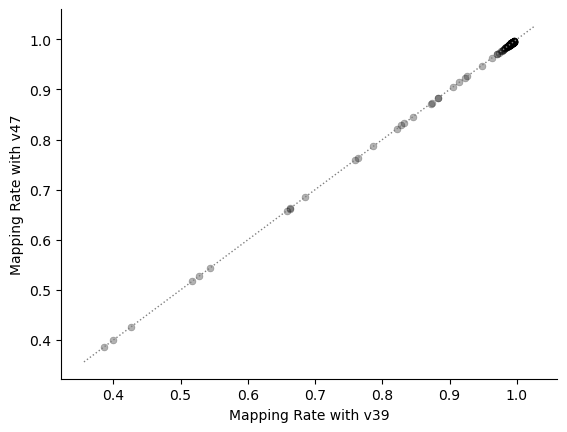

In [42]:
ax = sns.scatterplot(merged_metrics, x='Mapping Rate with v39', y='Mapping Rate with v47', s=25, edgecolor=None, alpha=.3, color='k')
ax.spines[['top', 'right']].set_visible(False)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # lower limit
    np.max([ax.get_xlim(), ax.get_ylim()]),  # upper limit
]

ax.plot(lims, lims, ls=':', color='gray', linewidth=1)


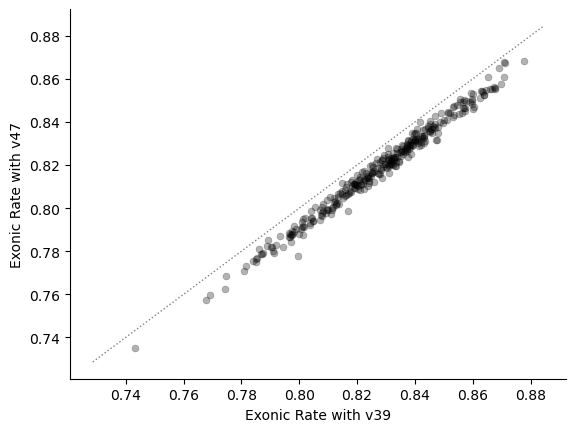

In [41]:
ax = sns.scatterplot(merged_metrics, x='Exonic Rate with v39', y='Exonic Rate with v47', s=25, edgecolor=None, alpha=.3, color='k')
ax.spines[['top', 'right']].set_visible(False)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # lower limit
    np.max([ax.get_xlim(), ax.get_ylim()]),  # upper limit
]

ax.plot(lims, lims, ls=':', color='gray', linewidth=1)
